In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc("mathtext", default="regular")
import seaborn as sns
sns.set_style("white")
from matplotlib import dates
from pandas import Series,DataFrame,concat
import matplotlib.dates as mdates
from datetime import datetime

In [3]:
import pandas as pd
from jqdatasdk import *
auth('18571452047','XIAOsikang123456')

提示：当前环境pandas版本为0.25，get_price与get_fundamentals_continuously接口panel参数将固定为False
注意：0.25以上版本pandas不支持panel，如使用该数据结构和相关函数请注意修改
auth success 


In [4]:
start = "2018-01-01"
end = "2019-09-01"
q = query(opt.OPT_CONTRACT_INFO).filter(
    opt.OPT_CONTRACT_INFO.underlying_symbol=='510050.XSHG',
    opt.OPT_CONTRACT_INFO.list_date>start,
    opt.OPT_CONTRACT_INFO.list_date<end)
ins = opt.run_query(q)
callOption = ins[ins["contract_type"]=="CO"].code.tolist()
putOption = ins[ins["contract_type"]=="PO"].code.tolist()

In [14]:
codf = get_price(callOption,start_date=start, end_date=end, frequency='5d', fields=["volume","money"], skip_paused=False, fq='pre', count=None, panel=False)
podf = get_price(putOption,start_date=start, end_date=end, frequency='5d', fields=["volume","money"], skip_paused=False, fq='pre', count=None, panel=False)

In [15]:
callvol = pd.pivot_table(codf, values=["money", "volume"], index="time", aggfunc=[np.sum], dropna=True)
putvol = pd.pivot_table(podf, values=["money", "volume"], index="time", aggfunc=[np.sum], dropna=True)

In [16]:
etf = get_price("510050.XSHG",start_date=start, end_date=end, frequency='5d', fields=["close"], skip_paused=False, fq='pre', count=None, panel=False)

**对比下成交量和成交金额**

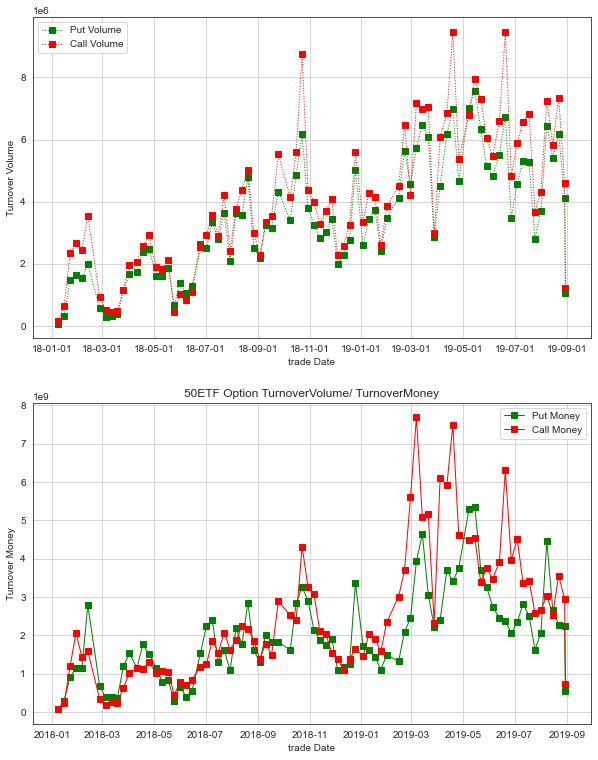

In [17]:
fig = plt.figure(figsize=(10,13))
ax = fig.add_subplot(211)

import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
ax.plot(putvol.index, putvol["sum", "volume"], ':gs',linewidth=1, label = u'Put Volume')
ax.plot(callvol.index, callvol["sum", "volume"], ':rs',linewidth=1, label = u'Call Volume')

ax.grid()
ax.set_xlabel(u"trade Date")
ax.set_ylabel(r"Turnover Volume")

ax1 = fig.add_subplot(212)
ax1.plot(putvol.index, putvol["sum", "money"], '-gs',linewidth=1, label = u'Put Money')
ax1.plot(callvol.index, callvol["sum", "money"], '-rs',linewidth=1, label = u'Call Money')
ax1.grid()
ax1.set_xlabel(u"trade Date")
ax1.set_ylabel(r"Turnover Money")

ax.legend(loc="best")
ax1.legend(loc="best")
plt.title('50ETF Option TurnoverVolume/ TurnoverMoney')

plt.show()

**对比50etf走势和基于成交量PCR**

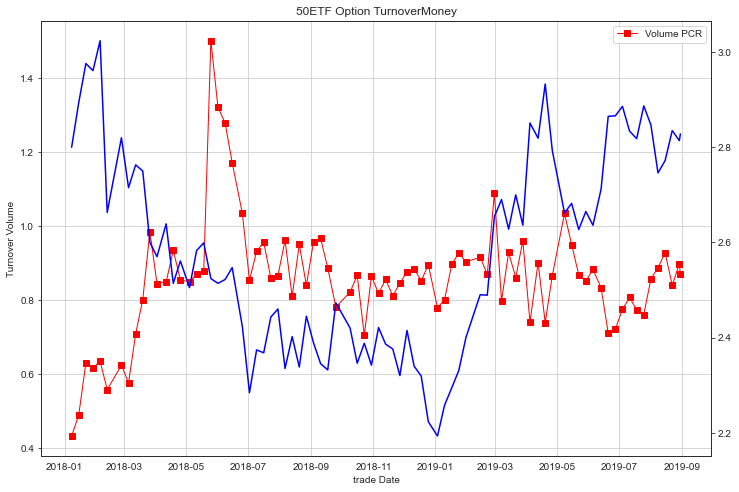

In [18]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
ax.plot(putvol.index, putvol["sum", "volume"]/callvol["sum", "volume"], '-rs',linewidth=1, label = u'Volume PCR')
# ax.plot(callvol.index, putvol["sum", "money"]/callvol["sum", "money"], '-rs', linewidth=1,label = u'Money PCR')
ax.legend(loc="best")

ax2 = ax.twinx()
lns3 = ax2.plot(etf.index, etf.close, 'b-', label = 'ETF closePrice')

ax.grid()
ax.set_xlabel(u"trade Date")
ax.set_ylabel(r"Turnover Volume")
plt.title('50ETF Option TurnoverMoney')

plt.show()